In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1lxVOmIyjpL0JITOA-06YSI_NMFIH3auz' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1lxVOmIyjpL0JITOA-06YSI_NMFIH3auz" -O dataset.zip && rm -rf /tmp/cookies.txt

--2020-07-27 13:29:53--  https://docs.google.com/uc?export=download&confirm=aQJG&id=1lxVOmIyjpL0JITOA-06YSI_NMFIH3auz
Resolving docs.google.com (docs.google.com)... 172.217.218.102, 172.217.218.138, 172.217.218.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.218.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-6s-docs.googleusercontent.com/docs/securesc/3ikq0ijl7r1vpl0emfbrbc7bubv9mc43/808p1dbr4nshkjin6o806gbkdsjh8gr1/1595856525000/05238359098448358793/01820598080783872277Z/1lxVOmIyjpL0JITOA-06YSI_NMFIH3auz?e=download [following]
--2020-07-27 13:29:53--  https://doc-0o-6s-docs.googleusercontent.com/docs/securesc/3ikq0ijl7r1vpl0emfbrbc7bubv9mc43/808p1dbr4nshkjin6o806gbkdsjh8gr1/1595856525000/05238359098448358793/01820598080783872277Z/1lxVOmIyjpL0JITOA-06YSI_NMFIH3auz?e=download
Resolving doc-0o-6s-docs.googleusercontent.com (doc-0o-6s-docs.googleusercontent.com)... 108.177.127.132, 2a00:1450:4013:c07::84
Conne

In [ ]:
!sudo apt-get install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
!unzip dataset.zip -d ./dataset

Streaming output truncated to the last 5000 lines.
 extracting: ./dataset/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
 extracting: ./dataset/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
 extracting: ./dataset/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
 extracting: ./dataset/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
 extracting: ./dataset/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
 extracting: ./dataset/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
 extracting: ./dataset/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
 extracting: ./dataset/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
 extracting: ./dataset/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
 extracting: ./dataset/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
 extracting: ./dataset/cell_images/Uninf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

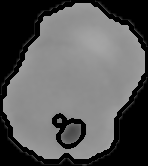

-1

In [ ]:
import cv2,os
import numpy as np
import csv
import glob
from google.colab.patches import cv2_imshow

label = "Parasitized"
dirList = glob.glob("./dataset/cell_images/"+label+"/*.png")
file = open("dataset.csv","a")

for img_path in dirList:
	im = cv2.imread(img_path)
	im = cv2.GaussianBlur(im,(5,5),2)
	im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
	ret,thresh = cv2.threshold(im_gray,127,255,0)
	contours,_ = cv2.findContours(thresh,1,2)
	for contour in contours:
		cv2.drawContours(im_gray, contours, -1, (0,255,0), 3)
	cv2_imshow(im_gray)

	break


	file.write(label)
	file.write(",")

	for i in range(5):
		try:
			area = cv2.contourArea(contours[i])
			file.write(str(area))
		except:
			file.write("0")

		file.write(",")

	
	file.write("\n")


cv2.waitKey(19000)


In [ ]:
  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
import joblib

dataframe = pd.read_csv("dataset.csv")
x = dataframe.drop(["Label"],axis=1)
y = dataframe["Label"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = RandomForestClassifier(n_estimators=100,max_depth=5) #100, 5 <-- default values
model.fit(x_train,y_train)
joblib.dump(model,"utk_malaria")

predictions = model.predict(x_test)

print(metrics.classification_report(predictions,y_test))
print(model.score(x_test,y_test))

EmptyDataError: ignored